In [173]:
# Anomaly Detection using Insider Threat Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load the data
df = pd.read_csv('cat_daily.csv')

In [174]:
df.head()

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1
1,Oscar,2,Software Engineer,43,0,12,12.0,3,17,0,7,0,6,1
2,Aarav,3,Software Engineer,59,1,11,0.0,3,14,6,3,0,3,1
3,Amber,4,Software Engineer,44,2,12,28.0,5,2,0,7,0,0,1
4,Aaron,5,Software Engineer,49,0,16,10.0,2,16,2,5,0,0,1


In [175]:
df.role.value_counts()

Security Engineer                 224
Software Engineer                 222
Frequency Transmission Systems    136
Project Manager                   135
Intelligence Officer              134
Designer                           44
Name: role, dtype: int64

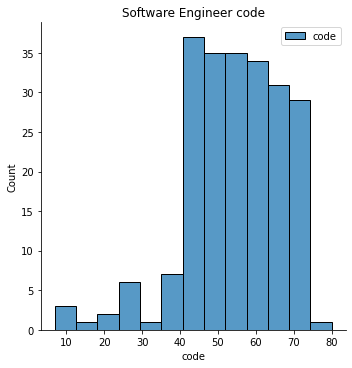

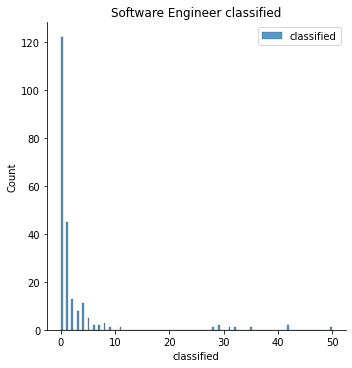

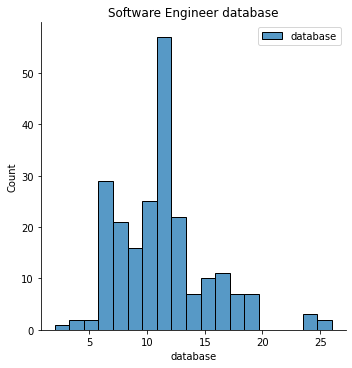

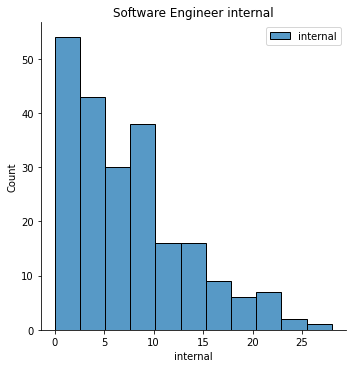

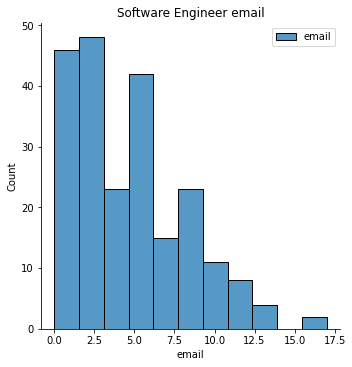

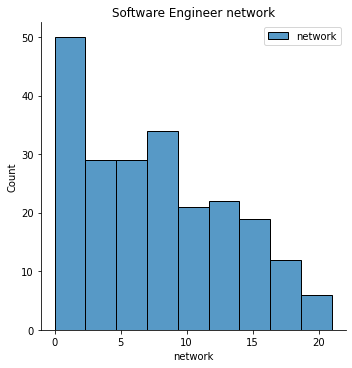

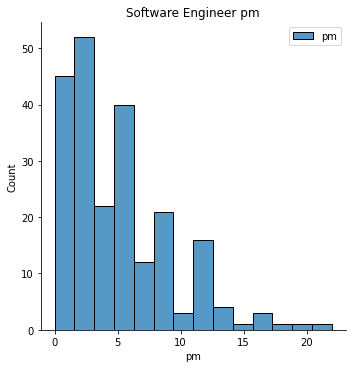

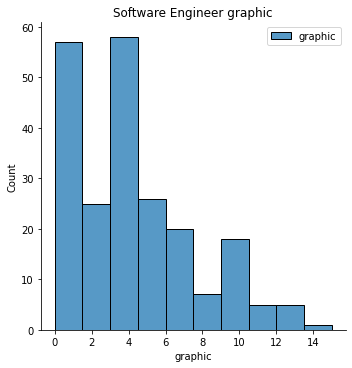

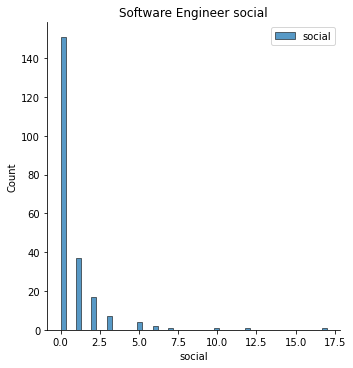

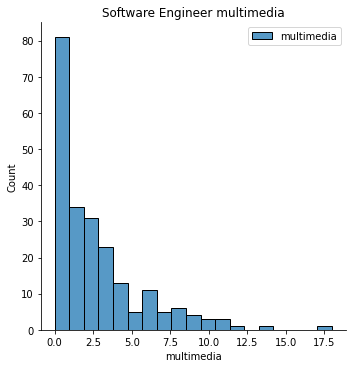

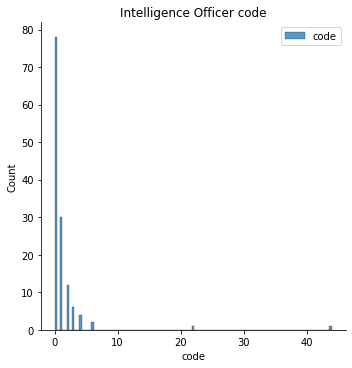

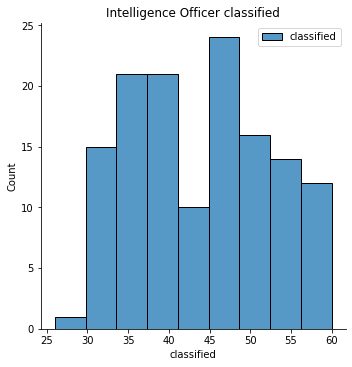

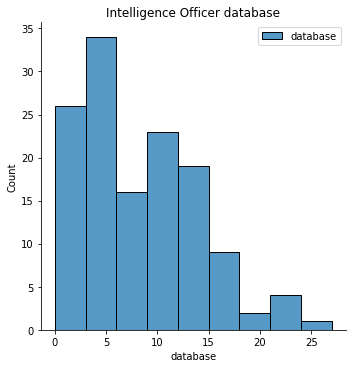

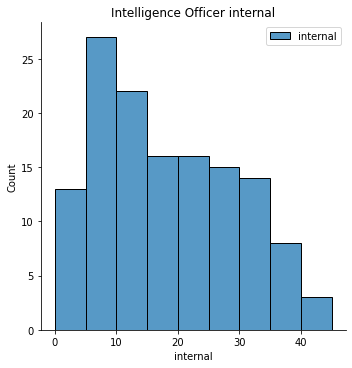

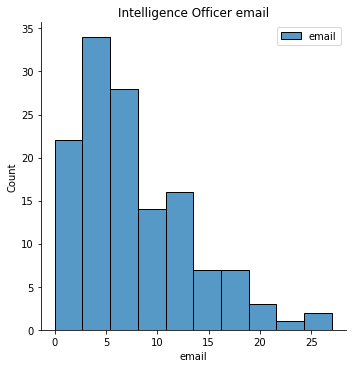

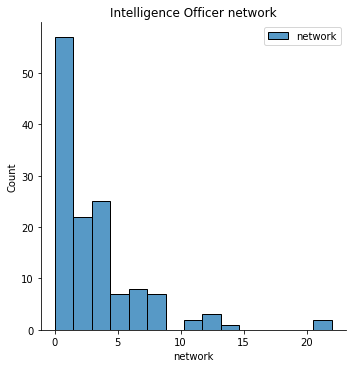

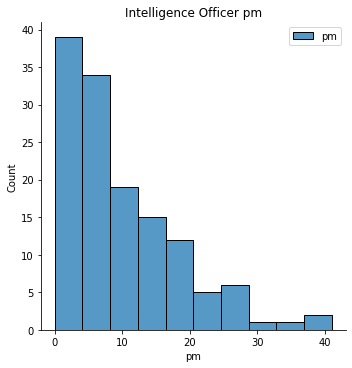

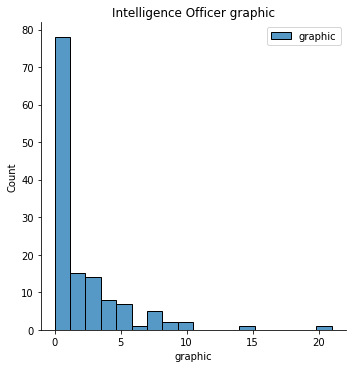

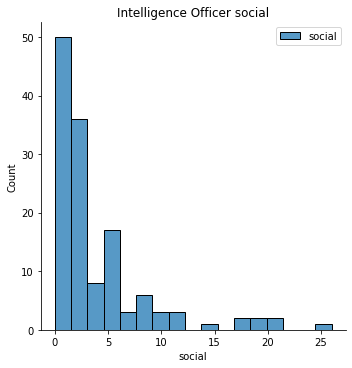

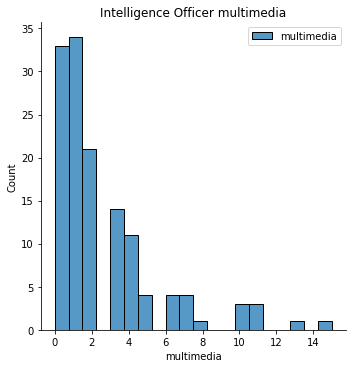

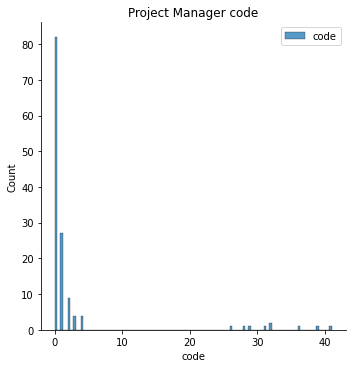

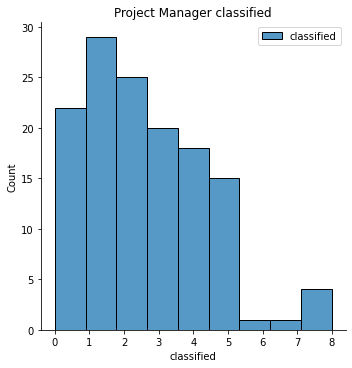

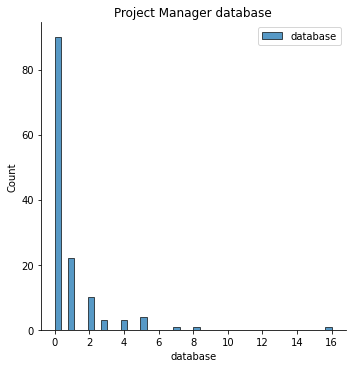

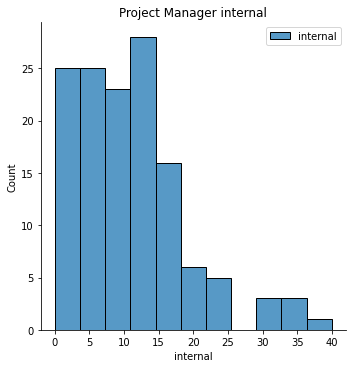

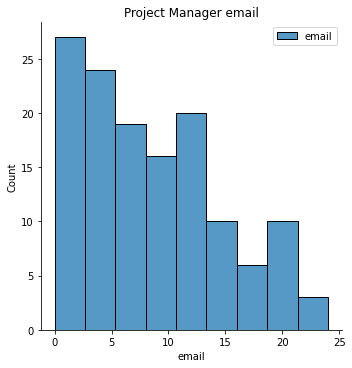

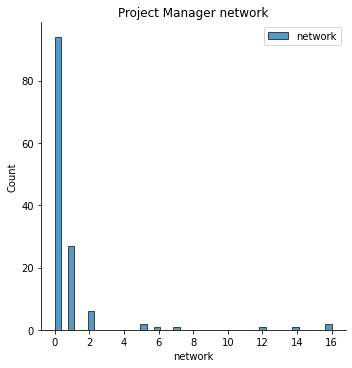

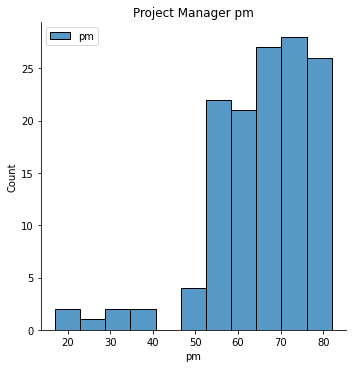

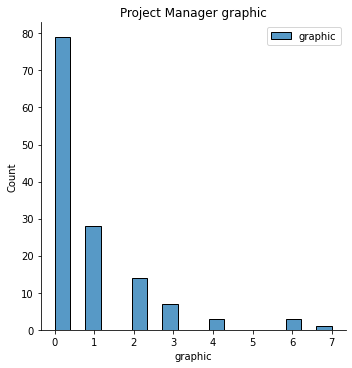

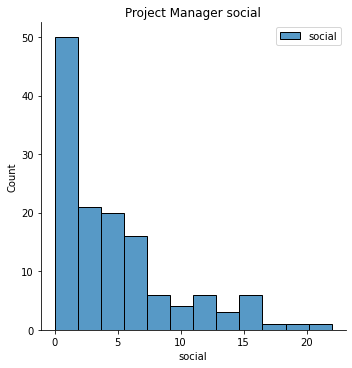

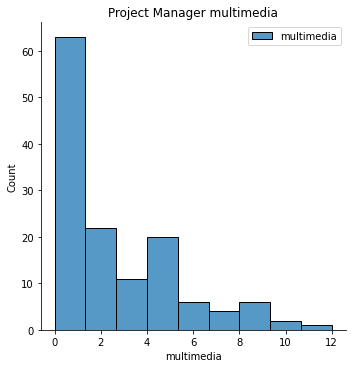

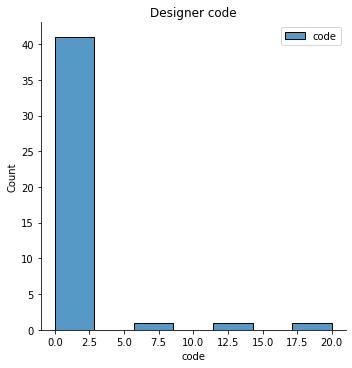

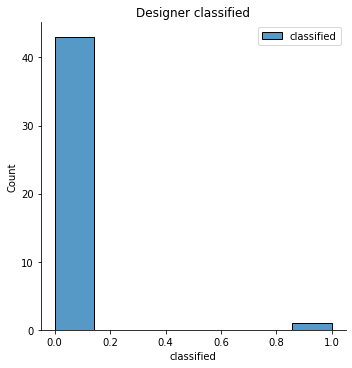

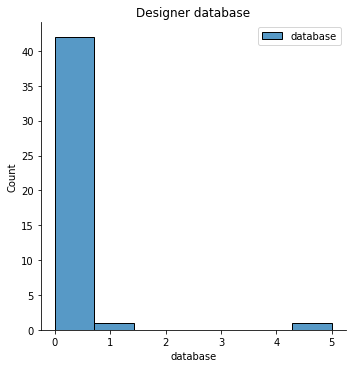

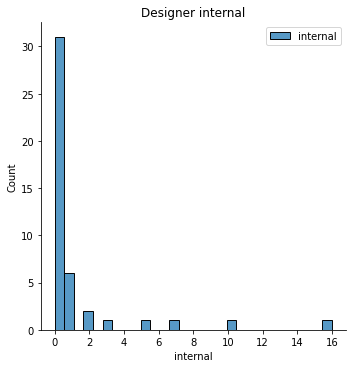

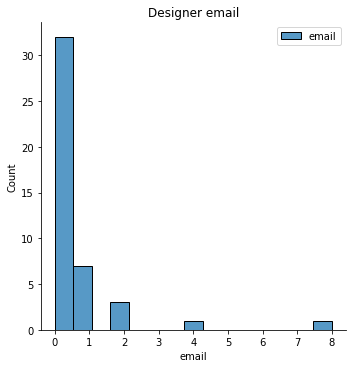

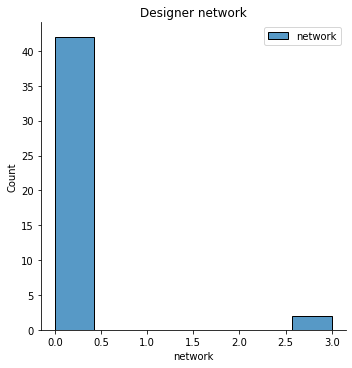

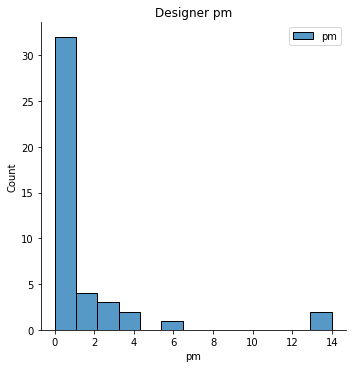

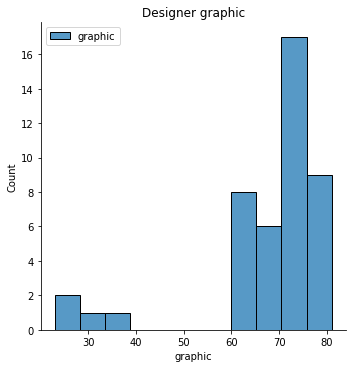

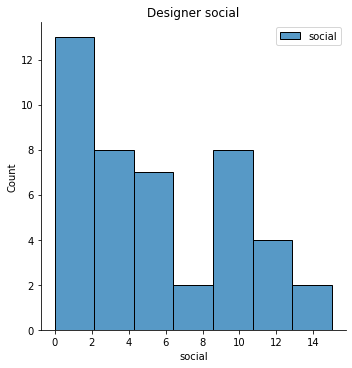

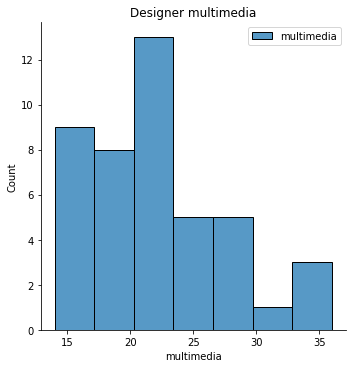

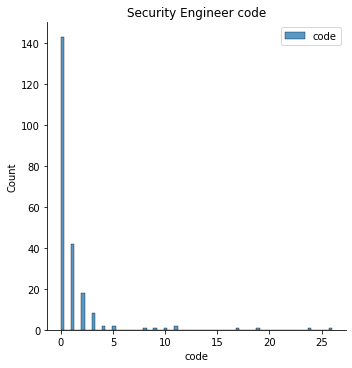

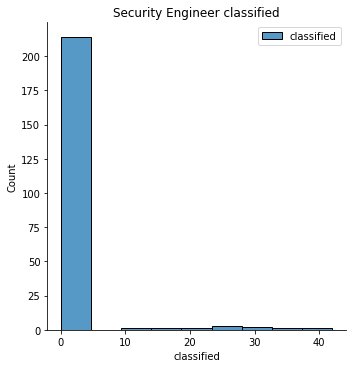

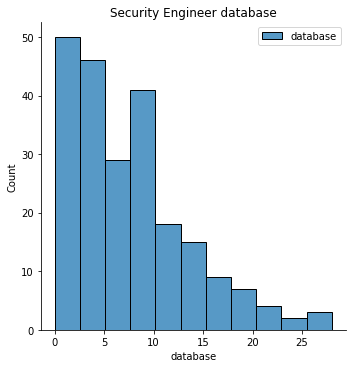

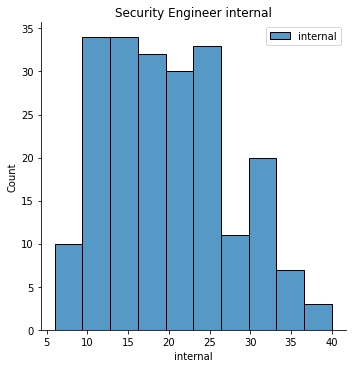

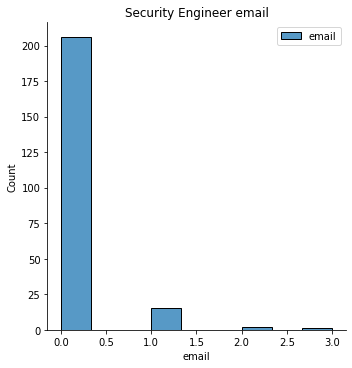

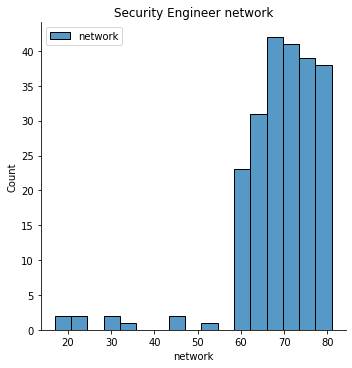

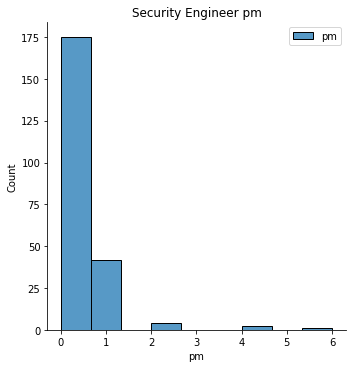

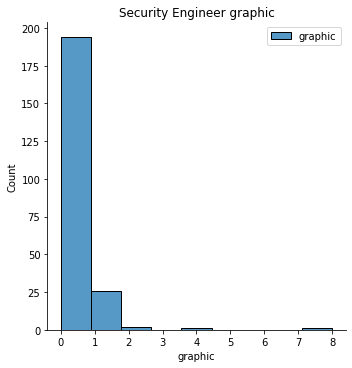

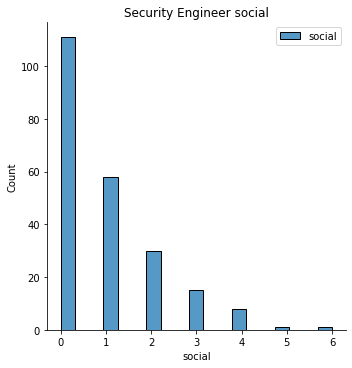

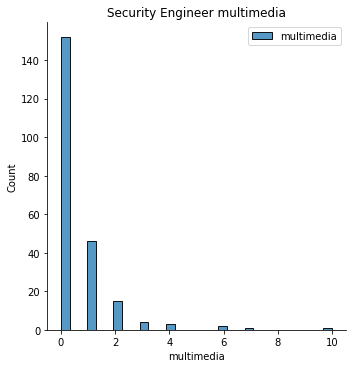

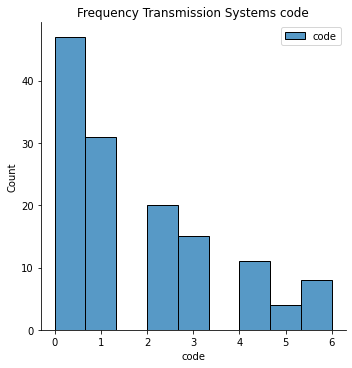

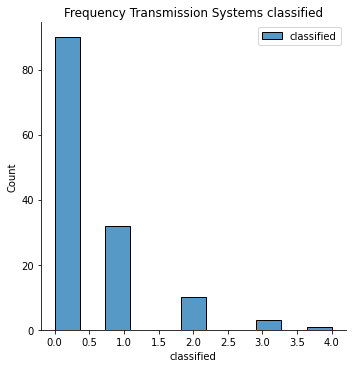

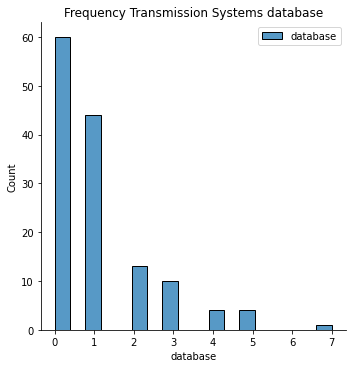

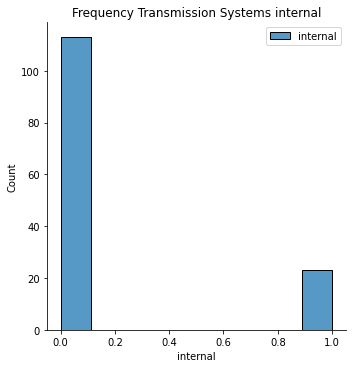

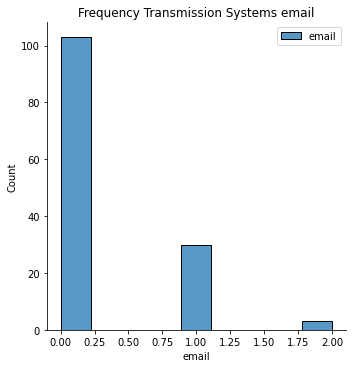

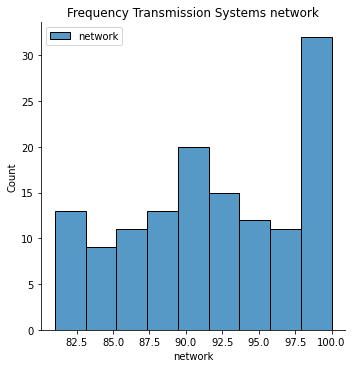

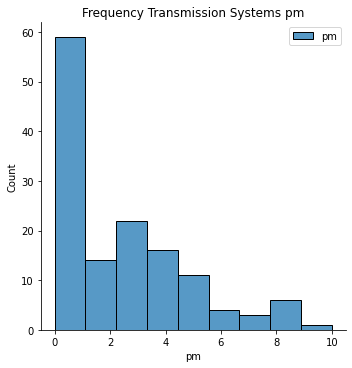

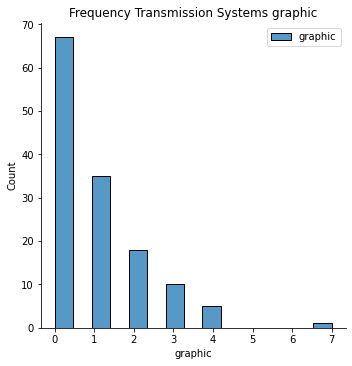

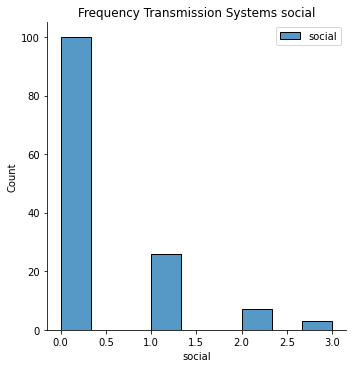

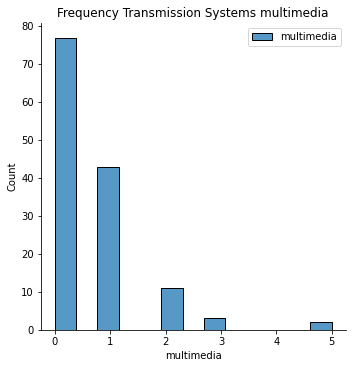

In [176]:
# For each role, plot the distribution of each column in the dataframe
for role in df.role.unique():
    for col in df.columns:
        if col != 'role' and col != 'name' and col != 'total' and col != 'id' and col != 'evaluation':
            sns.displot(df[df.role == role][col], label=col)
            plt.title(role + ' ' + col)
            plt.legend()
            plt.show()

In [177]:
df.head()

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1
1,Oscar,2,Software Engineer,43,0,12,12.0,3,17,0,7,0,6,1
2,Aarav,3,Software Engineer,59,1,11,0.0,3,14,6,3,0,3,1
3,Amber,4,Software Engineer,44,2,12,28.0,5,2,0,7,0,0,1
4,Aaron,5,Software Engineer,49,0,16,10.0,2,16,2,5,0,0,1


In [178]:
df_se = df[df.role == 'Software Engineer']
df_se

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1
1,Oscar,2,Software Engineer,43,0,12,12.0,3,17,0,7,0,6,1
2,Aarav,3,Software Engineer,59,1,11,0.0,3,14,6,3,0,3,1
3,Amber,4,Software Engineer,44,2,12,28.0,5,2,0,7,0,0,1
4,Aaron,5,Software Engineer,49,0,16,10.0,2,16,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Cyrus,218,Software Engineer,65,0,7,8.0,4,13,1,2,0,0,1
218,Daisy,219,Software Engineer,25,1,24,21.0,3,17,4,0,2,3,-1
219,Damon,220,Software Engineer,53,0,11,7.0,6,9,8,4,1,1,1
220,Danny,221,Software Engineer,72,1,8,0.0,0,12,2,1,0,4,1


In [179]:
model = IsolationForest(n_estimators=256, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(df_se[['code', 'database', 'network', 'graphic', 'email', 'internal', 'pm', 'multimedia', 'classified', 'social']])

IsolationForest(n_estimators=256, n_jobs=-1, random_state=42)

In [180]:
df_se['anomaly_score'] = model.decision_function(df_se[['code', 'database', 'network', 'graphic', 'email', 'internal', 'pm', 'multimedia', 'classified', 'social']])
df_se['anomaly'] = model.predict(df_se[['code', 'database', 'network', 'graphic', 'email', 'internal', 'pm', 'multimedia', 'classified', 'social']])
df_se.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation,anomaly_score,anomaly
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1,-0.081620,-1
1,Oscar,2,Software Engineer,43,0,12,12.0,3,17,0,7,0,6,1,0.049869,1
2,Aarav,3,Software Engineer,59,1,11,0.0,3,14,6,3,0,3,1,0.095944,1
3,Amber,4,Software Engineer,44,2,12,28.0,5,2,0,7,0,0,1,0.018711,1
4,Aaron,5,Software Engineer,49,0,16,10.0,2,16,2,5,0,0,1,0.089825,1
5,Aayan,6,Software Engineer,59,1,11,3.0,1,11,7,1,2,4,1,0.079143,1
6,Abbie,7,Software Engineer,65,0,7,7.0,7,4,6,4,0,0,1,0.109704,1
7,Abdul,8,Software Engineer,68,1,8,1.0,7,7,7,1,0,0,1,0.094167,1
8,Abner,9,Software Engineer,12,29,26,25.0,1,2,2,1,2,0,-1,-0.124606,-1
9,Abram,10,Software Engineer,61,4,13,8.0,8,1,1,1,3,0,1,0.047988,1


In [181]:
df_se[df_se.anomaly == -1]

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation,anomaly_score,anomaly
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1,-0.081620,-1
8,Abner,9,Software Engineer,12,29,26,25.0,1,2,2,1,2,0,-1,-0.124606,-1
15,Aedan,16,Software Engineer,19,42,19,5.0,2,1,5,0,7,0,-1,-0.097874,-1
18,Ahmed,19,Software Engineer,42,1,2,4.0,1,7,4,15,10,14,-1,-0.149750,-1
23,Akeem,24,Software Engineer,40,1,13,2.0,4,18,1,9,1,11,1,-0.003410,-1
29,Alfie,30,Software Engineer,48,0,10,21.0,0,0,3,13,0,5,1,-0.017417,-1
41,Alois,42,Software Engineer,43,5,11,0.0,12,4,5,13,0,7,1,-0.022990,-1
70,Anton,71,Software Engineer,52,0,12,0.0,7,0,9,1,1,18,1,-0.036156,-1
74,Arian,75,Software Engineer,7,32,24,21.0,2,3,1,2,5,3,-1,-0.124271,-1
75,Ariel,76,Software Engineer,47,1,16,1.0,0,0,18,12,1,4,1,-0.053339,-1


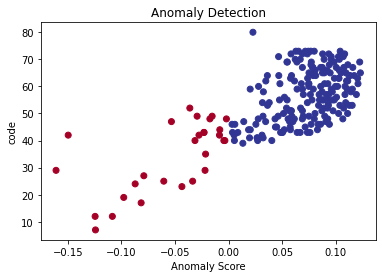

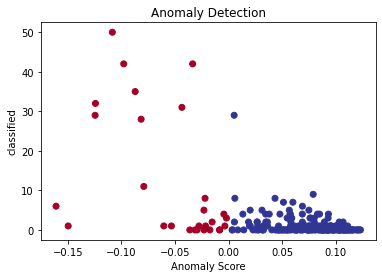

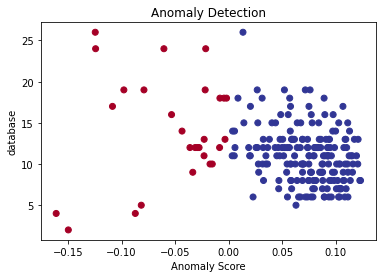

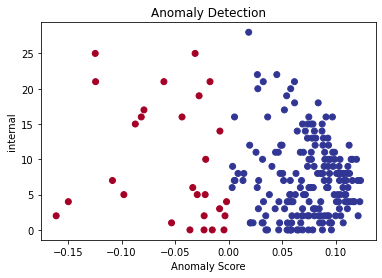

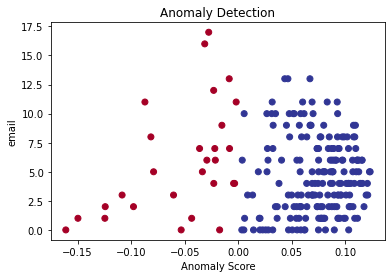

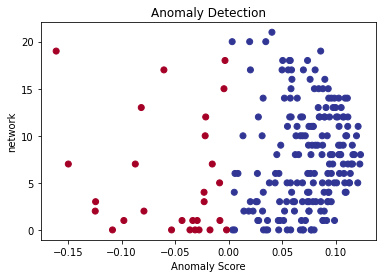

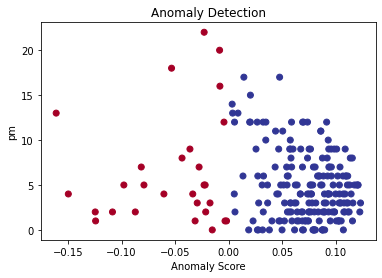

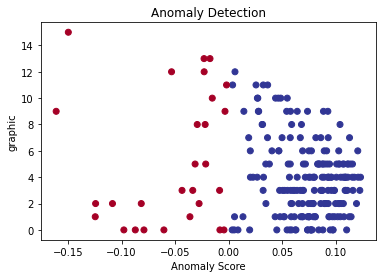

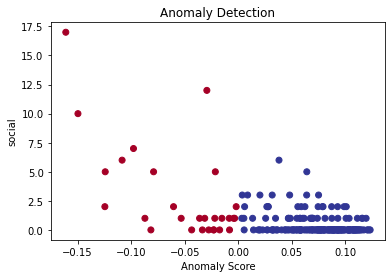

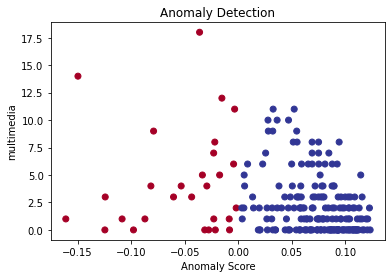

In [182]:
for col in df_se.columns:
    if col != 'name' and col != 'id' and col != 'role' and col != "anomaly_score" and col != "evaluation" and col != "anomaly":
      plt.scatter(df_se.anomaly_score, df_se[col], c=df_se.anomaly, cmap='RdYlBu')
      plt.ylabel(col)
      plt.xlabel('Anomaly Score')
      plt.title('Anomaly Detection')
      plt.show()

In [183]:
df_se.anomaly.value_counts()

 1    194
-1     28
Name: anomaly, dtype: int64

In [184]:
df_se.evaluation.value_counts()

 1    207
-1     15
Name: evaluation, dtype: int64

In [185]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(df_se.anomaly, df_se.evaluation)
print(matrix)
# Print the accuracy
print(np.trace(matrix) / np.sum(matrix))

[[ 14  14]
 [  1 193]]
0.9324324324324325


In [186]:
print("False Positive Rate")
print(matrix[0][1] / (matrix[0][1] + matrix[1][1]))

False Positive Rate
0.06763285024154589


In [187]:
print("False Negative Rate")
print(matrix[1][0] / (matrix[0][0] + matrix[1][0]))

False Negative Rate
0.06666666666666667


In [188]:
# print the records with different evaluation and anomaly
df_se[(df_se.evaluation != df_se.anomaly)]

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation,anomaly_score,anomaly
21,Aiden,22,Software Engineer,39,4,26,7.0,3,10,6,1,1,3,-1,0.013372,1
23,Akeem,24,Software Engineer,40,1,13,2.0,4,18,1,9,1,11,1,-0.003410,-1
29,Alfie,30,Software Engineer,48,0,10,21.0,0,0,3,13,0,5,1,-0.017417,-1
41,Alois,42,Software Engineer,43,5,11,0.0,12,4,5,13,0,7,1,-0.022990,-1
70,Anton,71,Software Engineer,52,0,12,0.0,7,0,9,1,1,18,1,-0.036156,-1
75,Ariel,76,Software Engineer,47,1,16,1.0,0,0,18,12,1,4,1,-0.053339,-1
110,Baker,111,Software Engineer,42,1,12,19.0,17,0,7,2,0,0,1,-0.027621,-1
116,Benny,117,Software Engineer,40,0,12,25.0,16,0,1,5,1,0,1,-0.031336,-1
124,Blair,125,Software Engineer,44,0,18,14.0,7,1,16,0,0,0,1,-0.008168,-1
129,Bobby,130,Software Engineer,49,2,10,0.0,9,7,0,10,1,12,1,-0.015308,-1
